In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# set datetime index
resampled_data = pd.read_csv("Sprint_Resampled Data.csv")
resampled_data['Date'] = resampled_data['Date'].apply(pd.to_datetime)
resampled_data = resampled_data.set_index('Date')

In [4]:
resampled_data['U.S. Field Production of Crude Oil (Thousand Barrels)']

Date
1920-01-31     34008.0
1920-02-29     33193.0
1920-03-31     36171.0
1920-04-30     34945.0
1920-05-31     36622.0
1920-06-30     36663.0
1920-07-31     37746.0
1920-08-31     38906.0
1920-09-30     37521.0
1920-10-31     39584.0
1920-11-30     38609.0
1920-12-31     38961.0
1921-01-31     38138.0
1921-02-28     35524.0
1921-03-31     41105.0
1921-04-30     40233.0
1921-05-31     42189.0
1921-06-30     40548.0
1921-07-31     40461.0
1921-08-31     41109.0
1921-09-30     36763.0
1921-10-31     35832.0
1921-11-30     38108.0
1921-12-31     42173.0
1922-01-31     43696.0
1922-02-28     41314.0
1922-03-31     47188.0
1922-04-30     45167.0
1922-05-31     47002.0
1922-06-30     46087.0
                ...   
2017-03-31    284029.0
2017-04-30    273009.0
2017-05-31    284660.0
2017-06-30    273236.0
2017-07-31    286288.0
2017-08-31    286702.0
2017-09-30    285356.0
2017-10-31    299250.0
2017-11-30    302120.0
2017-12-31    309172.0
2018-01-31    310548.0
2018-02-28    287879.0
2018-0

In [5]:
# handling missing value
test = resampled_data['1991-3': '2019-5'].dropna(axis=1)
train = test[:int(0.8*(len(test)))]
valid = test[int(0.8*(len(test))):]
resampled_data
model = VAR(endog=train)
model_fit = model.fit()
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/home/yuntong/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/home/yuntong/.local/lib/python3.6/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [6]:
test.columns
# production col 0


Index(['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
       'U.S. Field Production of Crude Oil (Thousand Barrels)',
       'Weekly U.S. Product Supplied of Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Distillate Fuel Oil  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Residual Fuel Oil  (Thousand Barrels per Day)',
       'Weekly U.S. Exports of Crude Oil and Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Exports of Crude Oil  (Thousand Barrels per Day)',
       'Weekly U.S. Exports of Total Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Imports of Crude Oil and Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Imports of Crude Oil  (Thousand Barrels per Day)',
    

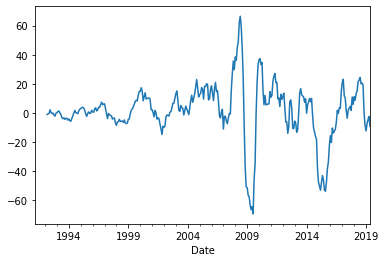

In [7]:
# remove seasonality
test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].diff(12).plot()

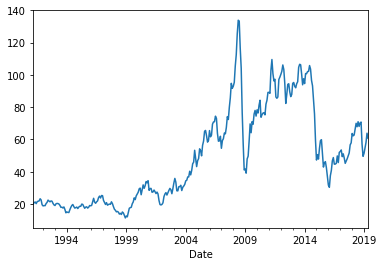

In [8]:
test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].plot()

In [9]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[test.columns])
pred = pred.set_index(valid.index)

for j in range(0,18):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]
# for i in test.columns:
#     print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

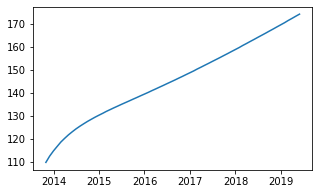

In [10]:
fig, ax = plt.subplots(figsize=(5, 3))
l1 = plt.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])


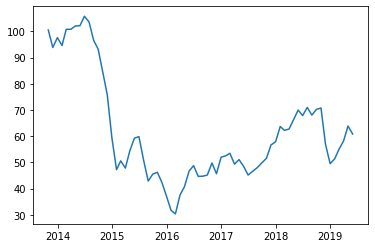

In [11]:
l2 = plt.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])

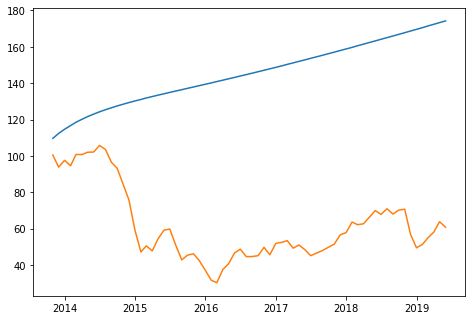

In [12]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="x**2")
ax.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="x**3")

In [13]:
test.tail()

,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",U.S. Field Production of Crude Oil (Thousand Barrels),Weekly U.S. Product Supplied of Petroleum Products (Thousand Barrels per Day),Weekly U.S. Product Supplied of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel (Thousand Barrels per Day),Weekly U.S. Product Supplied of Distillate Fuel Oil (Thousand Barrels per Day),Weekly U.S. Product Supplied of Residual Fuel Oil (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),...,Weekly U.S. Imports of Residual Fuel Oil (Thousand Barrels per Day),Weekly U.S. Refiner Net Input of Crude Oil (Thousand Barrels per Day),Weekly U.S. Gross Inputs into Refineries (Thousand Barrels per Day),Weekly U. S. Operable Crude Oil Distillation Capacity (Thousand Barrels per Calendar Day),Weekly U.S. Percent Utilization of Refinery Operable Capacity (Percent),Weekly U.S. Refiner and Blender Adjusted Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Kerosene-Type Jet Fuel (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Distillate Fuel Oil (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Residual Fuel Oil (Thousand Barrels per Day)
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,51.375714,367546.0,20725.75,8933.00,1652.25,4048.50,311.00,7143.50,2252.5,4891.00,...,175.50,17075.25,17381.5,18603.5,93.425,9621.00,9576.00,1790.50,5299.50,401.00
2019-02-28,54.954737,326732.0,20785.50,8875.50,1677.25,4183.00,279.25,8014.25,3050.0,4964.25,...,176.75,16000.50,16259.0,18604.0,87.400,9629.25,9876.00,1730.50,4865.00,309.25
2019-03-31,58.151429,368642.0,20583.60,9173.20,1797.80,4235.20,183.60,7864.80,2870.0,4994.80,...,144.60,15977.60,16260.6,18604.0,87.400,9796.40,9934.00,1711.40,4898.60,328.00
2019-04-30,63.862381,364021.0,20202.25,9465.75,1714.75,3785.75,239.50,7814.50,2510.5,5304.00,...,194.00,16301.75,16626.0,18762.0,88.625,9948.50,10027.75,1714.25,5013.25,381.25
2019-05-31,60.826818,375354.0,20090.60,9456.60,1775.60,3889.20,257.00,8216.80,3041.2,5175.60,...,131.00,16672.80,16975.0,18766.0,90.460,9967.20,10134.40,1741.20,5229.00,368.60


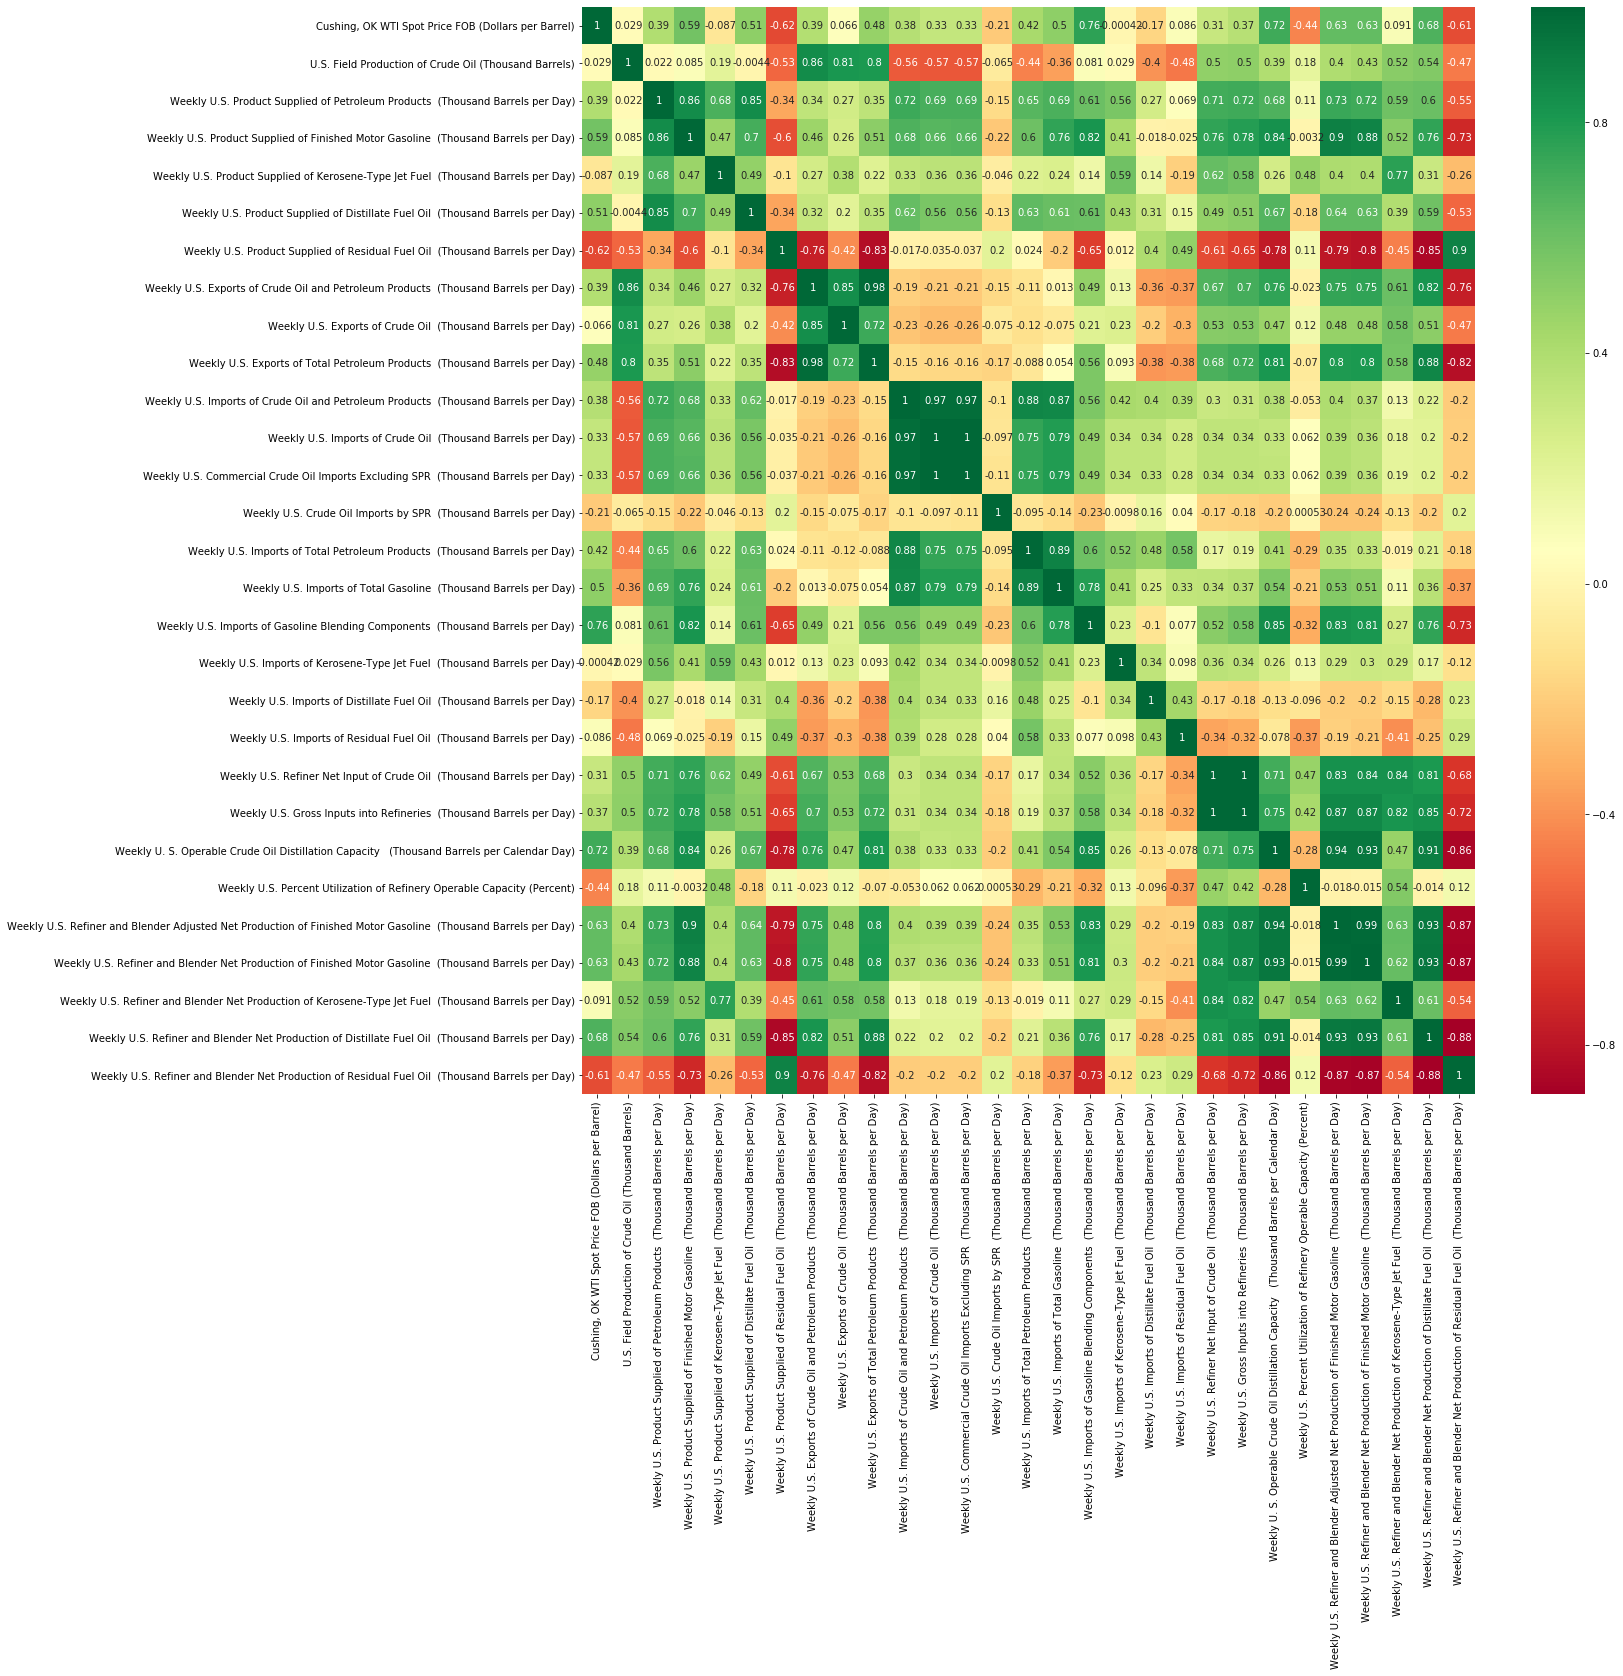

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
model = ExtraTreesClassifier()
X = test.iloc[:,1:28]
y = test.iloc[:,0]

# model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()
corrmat = test.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(test[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
matrix = test[top_corr_features].corr()
matrix["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"].sort_values()
# matri

Weekly U.S. Product Supplied of Residual Fuel Oil  (Thousand Barrels per Day)                                    -0.617912
Weekly U.S. Refiner and Blender Net Production of Residual Fuel Oil  (Thousand Barrels per Day)                  -0.608948
Weekly U.S. Percent Utilization of Refinery Operable Capacity (Percent)                                          -0.437696
Weekly U.S. Crude Oil Imports by SPR  (Thousand Barrels per Day)                                                 -0.209279
Weekly U.S. Imports of Distillate Fuel Oil  (Thousand Barrels per Day)                                           -0.167582
Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel  (Thousand Barrels per Day)                               -0.087176
Weekly U.S. Imports of Kerosene-Type Jet Fuel  (Thousand Barrels per Day)                                        -0.000417
U.S. Field Production of Crude Oil (Thousand Barrels)                                                             0.028640
Weekly U.S. Expo

In [18]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

model = preprocessing.LabelEncoder()
X = test.iloc[:,1:28]
y = test.iloc[:,0]

model.fit()
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

ValueError: bad input shape (339, 27)